In [198]:
import joblib 
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from experiments_helpers import ExperimentResults

if 'src' in os.getcwd():
    os.chdir('..')
    print(os.getcwd())

folder = 'results_bench'
name = 'torch-fico-statrobxplus-config06'

idx = 0
es_base: ExperimentResults = ExperimentResults.load_results_from_file(f'{folder}/{name}_{idx}.joblib')

es_base.pretty_print_robust_vs_base()

ExperimentResults with 18 metrics and 0 artifacts.
############################## Metrics ##############################
------------------------- Base metrics -------------------------
validity: 1.00 (std: 0.00)
proximityL1: 1.74 (std: 1.18)
lof: -1.40 (std: 0.35)
cf_counterfactual_stability: 0.41 (std: 0.04)
generation_time: 0.02 (std: 0.01)
------------------------- Base metrics 2 -------------------------
validity_2: 0.69 (std: 0.46)
proximityL1_2: 1.74 (std: 1.18)
lof_2: -1.40 (std: 0.35)
cf_counterfactual_stability_2: 0.43 (std: 0.05)
------------------------- Robust metrics -------------------------
robust_validity: 1.00 (std: 0.00)
robust_proximityL1: 1.93 (std: 0.95)
robust_lof: -1.25 (std: 0.26)
robust_cf_counterfactual_stability: 0.48 (std: 0.06)
robust_generation_time: 1.43 (std: 0.92)
------------------------- Robust metrics 2 -------------------------
robust_validity_2: 0.89 (std: 0.32)
robust_proximityL1_2: 1.93 (std: 0.95)
robust_lof_2: -1.25 (std: 0.26)
robust_cf_count

In [199]:
es_base.get_results_as_pandas()

,validity,proximityL1,lof,cf_counterfactual_stability,validity_2,proximityL1_2,lof_2,cf_counterfactual_stability_2,generation_time,robust_validity,robust_proximityL1,robust_lof,robust_cf_counterfactual_stability,robust_validity_2,robust_proximityL1_2,robust_lof_2,robust_cf_counterfactual_stability_2,robust_generation_time
0,1,1.629797,-1.447592,0.402634,0,1.629797,-1.447592,0.419490,0.008271,1,1.442019,-1.143584,0.501402,1,1.442019,-1.143584,0.460165,1.140913
1,1,4.997950,-1.913123,0.403176,0,4.997950,-1.913123,0.481116,0.026465,1,4.683373,-1.772108,0.425682,0,4.683373,-1.772108,0.453049,1.686711
2,1,4.181652,-2.725066,0.407084,0,4.181652,-2.725066,0.571349,0.032620,1,3.181518,-1.753642,0.560518,1,3.181518,-1.753642,0.451472,1.934189
3,1,0.096194,-1.031261,0.406887,1,0.096194,-1.031261,0.423972,0.013119,1,0.096194,-1.031261,0.411255,1,0.096194,-1.031261,0.423540,0.124731
4,1,0.805727,-2.306226,0.381148,0,0.805727,-2.306226,0.632195,0.020739,1,3.047750,-1.485251,0.464056,0,3.047750,-1.485251,0.428806,1.378950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1,3.144316,-1.234099,0.561760,1,3.144316,-1.234099,0.546376,0.015178,1,2.961711,-1.167379,0.555802,1,2.961711,-1.167379,0.546225,1.384894
197,1,2.993735,-1.628854,0.445171,1,2.993735,-1.628854,0.436563,0.022487,1,2.800556,-1.395364,0.468677,1,2.800556,-1.395364,0.417919,2.420150
198,1,2.886933,-1.487474,0.495841,1,2.886933,-1.487474,0.446424,0.013408,1,2.773696,-1.173740,0.595636,1,2.773696,-1.173740,0.584277,3.494130
199,1,0.309320,-1.016576,0.372202,0,0.309320,-1.016576,0.404016,0.004234,1,0.693602,-0.982378,0.422754,1,0.693602,-0.982378,0.421534,1.463729


In [202]:
res = es_base.get_results_as_pandas()
res = res.dropna() #TODO investigate what causes nulls 
res = res[res['robust_validity'] > 0] #TODO fix so robust cf is always valid for model 1
cols = [x for x in res.columns if 'prox' in x]
res[cols].mean()

proximityL1             1.743662
proximityL1_2           1.743662
robust_proximityL1      1.925118
robust_proximityL1_2    1.925118
dtype: float64

In [176]:
name = 'torch-fico-robx-var01-config0'

robs = []
robs_std = []

threshs = np.array([6,7,8,9])
for i, a in enumerate(threshs):
    f = f'{folder}/{name}{a}_0.joblib'
    print(f)
    er = ExperimentResults.load_results_from_file(f)
    res = er.get_results_as_pandas()
    # res = res.dropna() #TODO investigate what causes nulls 
    # res = res[res['robust_validity'] > 0] #TODO fix so robust cf is always valid for model 1
    cols = [x for x in res.columns if 'validity' in x]
    means = res[cols].mean().to_numpy()
    stds = res[cols].std().to_numpy()
    robs.append(means)
    robs_std.append(stds)

df_stdev = pd.DataFrame(robs_std, columns=cols)
print('stddevs:', df_stdev.round(3))
df = pd.DataFrame(robs, columns=cols).round(3)
df.columns = ['validity_orig_1', 'validity_orig_2', 'validity_statrob_1', 'validity_statrob_2']
df['alpha-Rob'] = threshs / 10
df

results_bench/torch-fico-robx-var01-config06_0.joblib
results_bench/torch-fico-robx-var01-config07_0.joblib
results_bench/torch-fico-robx-var01-config08_0.joblib
results_bench/torch-fico-robx-var01-config09_0.joblib
stddevs:    validity  validity_2  robust_validity  robust_validity_2
0       0.0       0.447              0.0                0.0
1       0.0       0.427              0.0                0.0
2       0.0       0.454              0.0                0.0
3       0.0       0.418              0.0                0.0


,validity_orig_1,validity_orig_2,validity_statrob_1,validity_statrob_2,alpha-Rob
0,1.0,0.726,1.0,1.0,0.6
1,1.0,0.761,1.0,1.0,0.7
2,1.0,0.711,1.0,1.0,0.8
3,1.0,0.776,1.0,1.0,0.9


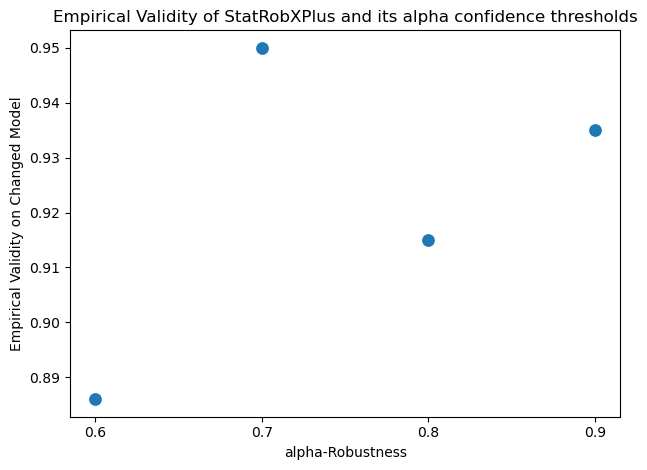

In [164]:
sns.scatterplot(data=df, x='alpha-Rob', y='validity_statrob_2', s=100, legend=False)
#Increase the size of the scatter points


plt.title('Empirical Validity of StatRobXPlus and its alpha confidence thresholds')
plt.xlabel('alpha-Robustness')
plt.xticks([0.6, 0.7, 0.8, 0.9])
plt.ylabel('Empirical Validity on Changed Model')
plt.savefig(f'{folder}/{name}_val_rob_corr.png')

plt.tight_layout()
plt.show()

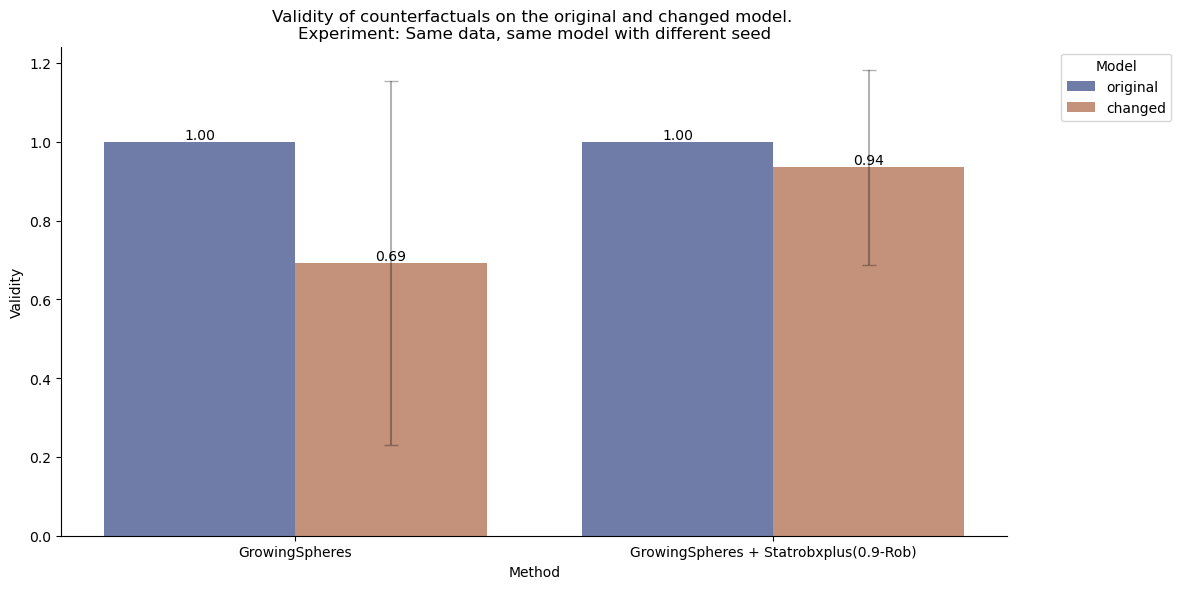

                    Validity  StdDev     model  \
validity_orig_1        1.000   0.000  original   
validity_orig_2        0.692   0.463   changed   
validity_statrob_1     1.000   0.000  original   
validity_statrob_2     0.935   0.247   changed   

                                                    Method  
validity_orig_1                             GrowingSpheres  
validity_orig_2                             GrowingSpheres  
validity_statrob_1  GrowingSpheres + Statrobxplus(0.9-Rob)  
validity_statrob_2  GrowingSpheres + Statrobxplus(0.9-Rob)  


In [157]:
table = df.drop('alpha-Rob', axis=1).iloc[3].to_frame().round(3)
# table.index = ['original_1', 'original_2', 'statrob_1', 'statrob_2']
table.columns = ['Validity']
table['StdDev'] = df_stdev.iloc[3].to_numpy().round(3)
table['model'] = ['original', 'changed', 'original', 'changed']
table['Method'] = ['GrowingSpheres', 'GrowingSpheres', 'GrowingSpheres + Statrobxplus(0.9-Rob)', 'GrowingSpheres + Statrobxplus(0.9-Rob)']



# Plotting the bar plot
sns.catplot(
    data=table, kind="bar",
    y="Validity", x="Method", hue="model",
    palette="dark", alpha=.6, height=6, legend=True, legend_out=False, aspect=2
)

# Adding error bars based on StdDev
for i, (validity, std_dev) in enumerate(zip(table['Validity'], table['StdDev'])):
    if i % 2 == 1:
        plt.errorbar(i / 2 - 0.3 , validity, yerr=std_dev, fmt='none', ecolor='black', capsize=5, alpha=0.3)

# Adding numbers on top of bars
ax = plt.gca()
for cont in ax.containers[:2]:
    for bar in cont:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Adjusting legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Model')

plt.title('Validity of counterfactuals on the original and changed model. \nExperiment: Same data, same model with different seed')
plt.tight_layout()
plt.savefig(f'{folder}/{name}_barplot.png')
plt.show()


print(table)

In [185]:
name = 'torch-fico-robx-var01-config0'

robs = []
robs_std = []
notna_count = []

threshs = np.array([6,7,8,9])
for i, a in enumerate(threshs):
    f = f'{folder}/{name}{a}_0.joblib'
    print(f)
    er = ExperimentResults.load_results_from_file(f)
    res = er.get_results_as_pandas()
    # res = res.dropna() #TODO investigate what causes nulls 
    # res = res[res['robust_validity'] > 0] #TODO fix so robust cf is always valid for model 1
    cols = [x for x in res.columns if 'validity' in x]
    means = res[cols].mean().to_numpy()
    stds = res[cols].std().to_numpy()
    robs.append(means)
    robs_std.append(stds)
    
    notna_count.append(res[cols].notna().sum().to_numpy())

df_stdev = pd.DataFrame(robs_std, columns=cols)
print('stddevs:', df_stdev.round(3))
df = pd.DataFrame(robs, columns=cols).round(3)
df.columns = ['validity_orig_1', 'validity_orig_2', 'validity_statrob_1', 'validity_statrob_2']
df['alpha-Rob'] = threshs / 10
df

results_bench/torch-fico-robx-var01-config06_0.joblib
results_bench/torch-fico-robx-var01-config07_0.joblib
results_bench/torch-fico-robx-var01-config08_0.joblib
results_bench/torch-fico-robx-var01-config09_0.joblib
stddevs:    validity  validity_2  robust_validity  robust_validity_2
0       0.0       0.447              0.0                0.0
1       0.0       0.427              0.0                0.0
2       0.0       0.454              0.0                0.0
3       0.0       0.418              0.0                0.0


,validity_orig_1,validity_orig_2,validity_statrob_1,validity_statrob_2,alpha-Rob
0,1.0,0.726,1.0,1.0,0.6
1,1.0,0.761,1.0,1.0,0.7
2,1.0,0.711,1.0,1.0,0.8
3,1.0,0.776,1.0,1.0,0.9


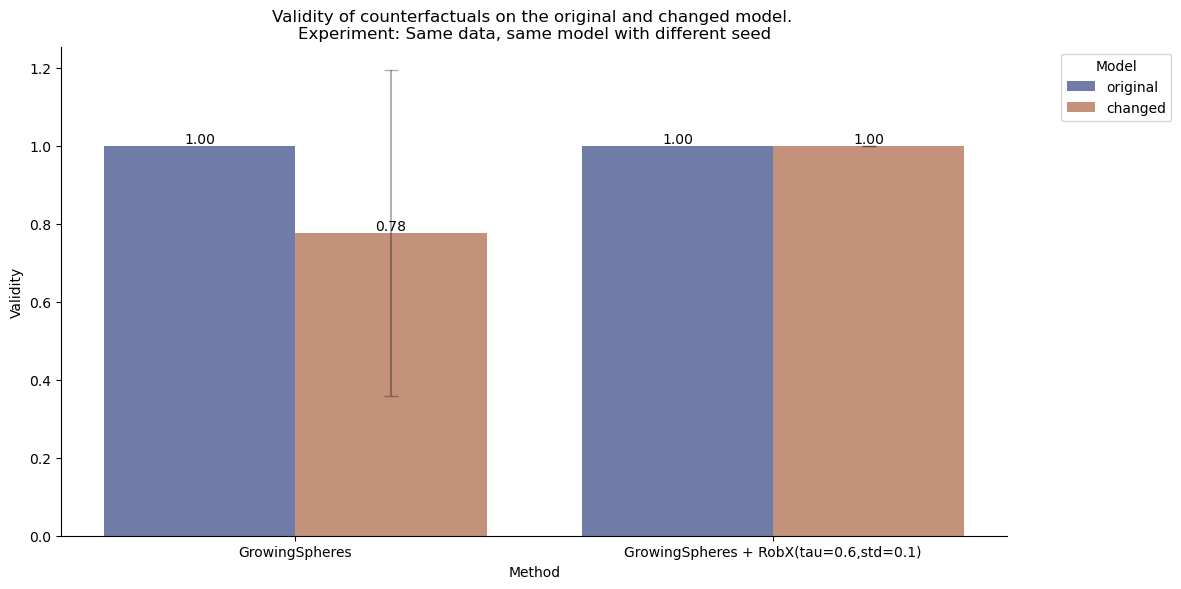

                    Validity  StdDev     model  \
validity_orig_1        1.000   0.000  original   
validity_orig_2        0.776   0.418   changed   
validity_statrob_1     1.000   0.000  original   
validity_statrob_2     1.000   0.000   changed   

                                                    Method  
validity_orig_1                             GrowingSpheres  
validity_orig_2                             GrowingSpheres  
validity_statrob_1  GrowingSpheres + RobX(tau=0.6,std=0.1)  
validity_statrob_2  GrowingSpheres + RobX(tau=0.6,std=0.1)  


In [193]:
table = df.drop('alpha-Rob', axis=1).iloc[3].to_frame().round(3)
# table.index = ['original_1', 'original_2', 'statrob_1', 'statrob_2']
table.columns = ['Validity']
table['StdDev'] = df_stdev.iloc[3].to_numpy().round(3)
table['model'] = ['original', 'changed', 'original', 'changed']
table['Method'] = ['GrowingSpheres', 'GrowingSpheres', 'GrowingSpheres + RobX(tau=0.6,std=0.1)', 'GrowingSpheres + RobX(tau=0.6,std=0.1)']



# Plotting the bar plot
sns.catplot(
    data=table, kind="bar",
    y="Validity", x="Method", hue="model",
    palette="dark", alpha=.6, height=6, legend=True, legend_out=False, aspect=2
)

# Adding error bars based on StdDev
for i, (validity, std_dev) in enumerate(zip(table['Validity'], table['StdDev'])):
    if i % 2 == 1:
        plt.errorbar(i / 2 - 0.3 , validity, yerr=std_dev, fmt='none', ecolor='black', capsize=5, alpha=0.3)

# Adding numbers on top of bars
ax = plt.gca()
for cont in ax.containers[:2]:
    for bar in cont:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Adjusting legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Model')

plt.title('Validity of counterfactuals on the original and changed model. \nExperiment: Same data, same model with different seed')
plt.tight_layout()
plt.savefig(f'{folder}/{name}_barplot.png')
plt.show()


print(table)

In [191]:
notna_df = pd.DataFrame(notna_count, columns=cols)
notna_df.index = ['tau=0.6', 'tau=0.7', 'tau=0.8', 'tau=0.9']
notna_df.columns = ['validity_base_original', 'validity_base_changed', 'validity_robx_original', 'validity_robx_changed']
print('How many instances were correctly returned by the explainer? For how many instances was RobX able to find a valid CF?')
notna_df

How many instances were correctly returned by the explainer? For how many instances was RobX able to find a valid CF?


,validity_base_original,validity_base_changed,validity_robx_original,validity_robx_changed
tau=0.6,201,201,201,201
tau=0.7,201,201,201,201
tau=0.8,201,201,64,64
tau=0.9,201,201,62,62
